# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# import Dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [7]:
# Generate coordinates
cities = []
coordinates = []
lat = np.random.uniform(-90, 90, size = 1600)
lng = np.random.uniform(-180, 80, size = 1600)
coordinates = zip(lat, lng)

# Find nearest city using citipy
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)
# Check number of cities        
len(cities)

558

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Base url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []

count = 0

# Request info for each city and append to respective list
for city in cities:
    try:
        city_info = requests.get(url+city.replace(" ", "&")).json()
        city_name.append(city_info['name'])
        lat.append(city_info['coord']['lat'])
        lng.append(city_info['coord']['lon'])
        temp.append(city_info['main']['temp'])
        humidity.append(city_info['main']['humidity'])
        cloudiness.append(city_info['clouds']['all'])
        wind.append(city_info['wind']['speed'])
        count += 1
        print(f"City found. Adding stats for record {count}... | {city}")
    except:
        print(f"City not found. Skipping...")

City found. Adding stats for record 1... | malinyi
City found. Adding stats for record 2... | vangaindrano
City found. Adding stats for record 3... | san patricio
City found. Adding stats for record 4... | mataura
City found. Adding stats for record 5... | port alfred
City found. Adding stats for record 6... | hithadhoo
City found. Adding stats for record 7... | kapaa
City found. Adding stats for record 8... | moberly
City found. Adding stats for record 9... | reconquista
City found. Adding stats for record 10... | sergeyevka
City found. Adding stats for record 11... | adre
City found. Adding stats for record 12... | riachao das neves
City found. Adding stats for record 13... | nizwa
City found. Adding stats for record 14... | longyearbyen
City found. Adding stats for record 15... | celestun
City found. Adding stats for record 16... | ponta do sol
City found. Adding stats for record 17... | maniitsoq
City found. Adding stats for record 18... | qaanaaq
City found. Adding stats for recor

City not found. Skipping...
City found. Adding stats for record 146... | wexford
City found. Adding stats for record 147... | suncuius
City found. Adding stats for record 148... | lompoc
City found. Adding stats for record 149... | murgab
City found. Adding stats for record 150... | georgetown
City found. Adding stats for record 151... | mangrol
City found. Adding stats for record 152... | marquette
City not found. Skipping...
City found. Adding stats for record 153... | tigre
City found. Adding stats for record 154... | itamaraju
City found. Adding stats for record 155... | rafaela
City found. Adding stats for record 156... | macedo de cavaleiros
City found. Adding stats for record 157... | morant bay
City found. Adding stats for record 158... | sarkand
City found. Adding stats for record 159... | strezhevoy
City found. Adding stats for record 160... | mabaruma
City found. Adding stats for record 161... | boa vista
City found. Adding stats for record 162... | maragogi
City found. Addi

City not found. Skipping...
City found. Adding stats for record 287... | bavly
City found. Adding stats for record 288... | eldorado
City found. Adding stats for record 289... | bondoukou
City found. Adding stats for record 290... | bataipora
City not found. Skipping...
City found. Adding stats for record 291... | ampanihy
City not found. Skipping...
City found. Adding stats for record 292... | port-gentil
City found. Adding stats for record 293... | salinopolis
City found. Adding stats for record 294... | tutoia
City found. Adding stats for record 295... | chunhuhub
City found. Adding stats for record 296... | nivala
City found. Adding stats for record 297... | pisco
City found. Adding stats for record 298... | armacao dos buzios
City found. Adding stats for record 299... | buzhakan
City found. Adding stats for record 300... | segezha
City found. Adding stats for record 301... | sembe
City found. Adding stats for record 302... | sao joao da barra
City found. Adding stats for record 30

City found. Adding stats for record 429... | calvinia
City found. Adding stats for record 430... | gornopravdinsk
City found. Adding stats for record 431... | schwalbach
City found. Adding stats for record 432... | calatayud
City found. Adding stats for record 433... | fort morgan
City found. Adding stats for record 434... | cumana
City found. Adding stats for record 435... | chancay
City found. Adding stats for record 436... | mehamn
City found. Adding stats for record 437... | cap-aux-meules
City found. Adding stats for record 438... | axim
City found. Adding stats for record 439... | luderitz
City found. Adding stats for record 440... | puerto ayacucho
City found. Adding stats for record 441... | shache
City not found. Skipping...
City not found. Skipping...
City found. Adding stats for record 442... | buchanan
City found. Adding stats for record 443... | kidal
City found. Adding stats for record 444... | wadi musa
City found. Adding stats for record 445... | maloy
City found. Addin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({
    "City Name": city_name,
    "Lat": lat,
    "Lng": lng,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind
})
weather_df.head()

,City Name,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Malinyi,-8.93,36.13,76.08,57,28,3.47
1,Vangaindrano,-23.35,47.60,67.01,88,13,4.88
2,San,13.30,-4.90,86.94,42,20,4.18
3,Mataura,-46.19,168.86,42.01,89,100,7.00
4,Port,-7.03,29.76,76.73,66,93,4.29


In [12]:
# Save dataframe to file
output_filepath =  "Output/weather_df.csv"
weather_df.to_csv(output_filepath, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
hot_cities = weather_df.index[weather_df["Humidity (%)"] > 100]

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(hot_cities, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
* This plot clearly shows that the closer a city is to the equator (latitude = 0), the hotter the temperature

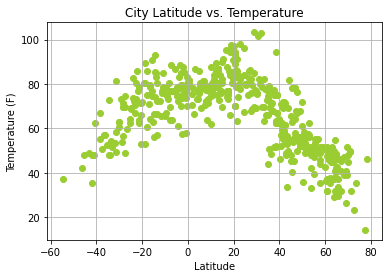

In [17]:
# Define x_axis
lat = clean_city_data["Lat"]

# Plot
plt.scatter(lat, clean_city_data["Temperature (F)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature")
plt.grid()
plt.savefig("Output/fig01.png")

## Latitude vs. Humidity Plot
* There doesn't seem to be a strong correlation between a city's latitude and level of humidity. Though there seems to be overall more cities with higher levels of humidity (>60%) in the early fall.

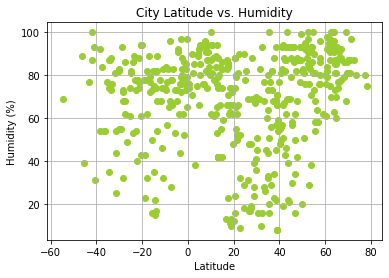

In [18]:
plt.scatter(lat, clean_city_data["Humidity (%)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("Output/fig02.png")

## Latitude vs. Cloudiness Plot
* There similarly doesn't seem to be much correlation between city latitude and level of cloudiness. The values for percent cloudiness seem to be clustered around round values (ie, 0, 20, 40, 90, 100)--this may indicate that it is difficult to get an accurate measure of cloudiness.

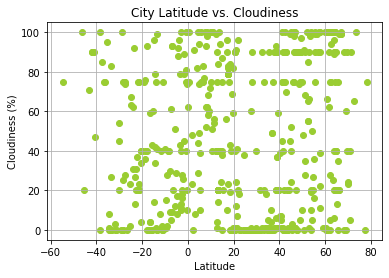

In [19]:
plt.scatter(lat, clean_city_data["Cloudiness (%)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Output/fig03.png")

## Latitude vs. Wind Speed Plot
* There is no strong relationship between city latitude and wind speed. We can observe that most wind speeds for all cities fall under 20 mph.

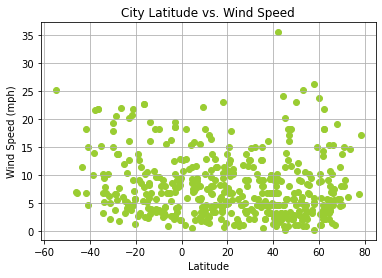

In [20]:
plt.scatter(lat, clean_city_data["Wind Speed (mph)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("Output/fig04.png")

## Linear Regression

####  Northern Hemisphere -  Latitude vs. Temp Linear Regression

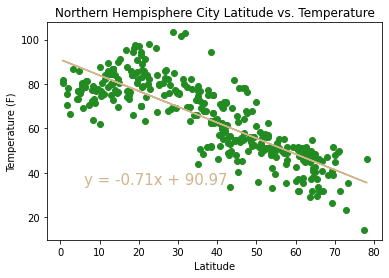

In [22]:
northern_cities = clean_city_data.loc[(clean_city_data["Lat"]>=0),:]
nx_values = northern_cities["Lat"]
n_temp = northern_cities["Temperature (F)"]

plt.scatter(nx_values, n_temp, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hempisphere City Latitude vs. Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_temp)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(6,35),fontsize=15,color="tan")
plt.savefig("Output/fig05.png")

####  Southern Hemisphere - Latitude vs. Temp Linear Regression

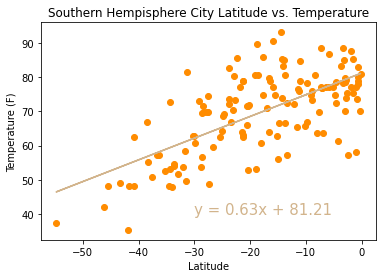

In [24]:
southern_cities = clean_city_data.loc[(clean_city_data["Lat"]<0),:]
sx_values = southern_cities["Lat"]
s_temp = southern_cities["Temperature (F)"]

plt.scatter(sx_values, s_temp, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hempisphere City Latitude vs. Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_temp)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-30, 40),fontsize=15,color="tan")
plt.savefig("Output/fig06.png")

#### Latitude vs. Temperature Linear Regression Analysis
There is a moderately strong correlation between a city's distance from the equator--whether it be towards the north or the south--and the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

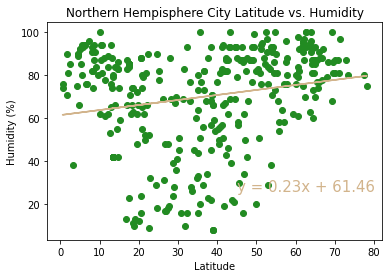

In [25]:
n_humidity = northern_cities["Humidity (%)"]

plt.scatter(nx_values, n_humidity, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hempisphere City Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_humidity)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(45, 26),fontsize=15,color="tan")
plt.savefig("Output/fig07.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

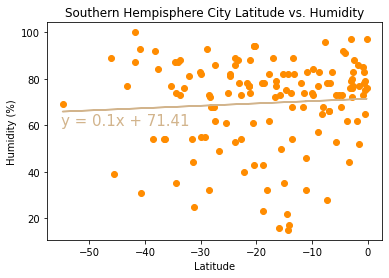

In [26]:
s_humidity = southern_cities["Humidity (%)"]

plt.scatter(sx_values, s_humidity, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hempisphere City Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_humidity)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-55, 60),fontsize=15,color="tan")
plt.savefig("Output/fig08.png")

#### Latitude vs. Humidity (%) Linear Regression Analysis
City latitude and percent humidity are very weakly correlated, regardless of whether the city is located in the northern or southern hemisphere.

####  Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

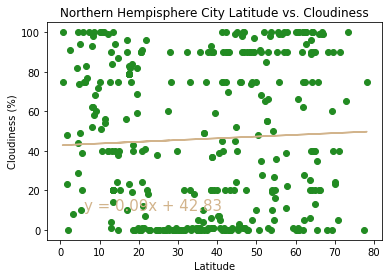

In [27]:
n_cloud = northern_cities["Cloudiness (%)"]

plt.scatter(nx_values, n_cloud, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hempisphere City Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_cloud)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(6,10),fontsize=15,color="tan")
plt.savefig("Output/fig09.png")

####  Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

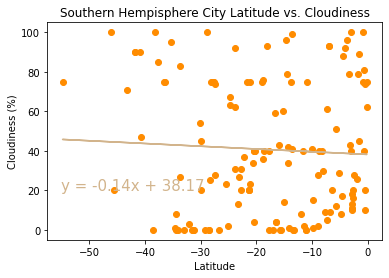

In [28]:
s_cloud = southern_cities["Cloudiness (%)"]

plt.scatter(sx_values, s_cloud, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hempisphere City Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_cloud)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-55, 20),fontsize=15,color="tan")
plt.savefig("Output/fig10.png")

#### Latitude vs. Cloudiness (%) Linear Regression Analysis
There is very low correlation between city latitude and percent cloudiness, thus it would difficult to gauge how cloudy a city is on a given day based on just it's location.

####  Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

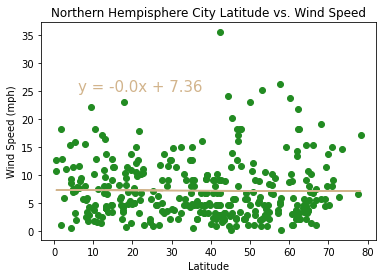

In [29]:
n_wind = northern_cities["Wind Speed (mph)"]

plt.scatter(nx_values, n_wind, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hempisphere City Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_wind)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(6,25),fontsize=15,color="tan")
plt.savefig("Output/fig11.png")

####  Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

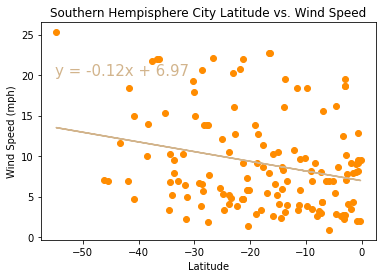

In [30]:
s_wind = southern_cities["Wind Speed (mph)"]

plt.scatter(sx_values, s_wind, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hempisphere City Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_wind)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-55, 20),fontsize=15,color="tan")
plt.savefig("Output/fig12.png")

#### Latitude vs. Wind Speed (mph) Linear Regression Analysis
Again, there relationship between a city's latitude and wind speed is depicted here to be weak. Wind speeds generally seem to fall uner 15 mph for all cities and cities with wind speeds over 15 mph follow no particular pattern with regards to their distance from the equator.